# **Artificial Neural Networks - Semester Project**

### **Handwritten Digits Classification with Deep Convolutional Neural Networks**

By:
*   Muhammad Fateh Tariq - FA17_BSCS_019
*   Mohammad Osama Syed - FA17_BSCS_069
*   Muhammad Saad Farooq - FA17_BSCS_086
*   Maryum Mehtab - FA17_BSCS_059

In [1]:
%matplotlib inline

**Libraries**

In [3]:
import numpy as np     
import matplotlib.pyplot as plt    
import random                     

from keras.datasets import mnist    
from keras.models import Sequential 

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils                

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import BatchNormalization

**Data Preprocessing**

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Normalisation of Data

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1) 
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')       
X_test = X_test.astype('float32')

X_train /= 255                             
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [6]:
nb_classes = 10 

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

**Deep Convolutional Model**

In [7]:
model = Sequential()

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) 
model.add(BatchNormalization(axis=-1))              
convLayer01 = Activation('relu')                    
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                   
model.add(BatchNormalization(axis=-1))              
model.add(Activation('relu'))
# Pooling Layer 1                 
convLayer02 = MaxPooling2D(pool_size=(2,2))          
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                      
model.add(BatchNormalization(axis=-1))              
convLayer03 = Activation('relu')               
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                       
model.add(BatchNormalization(axis=-1))            
model.add(Activation('relu'))
# Pooling Layer 2                    
convLayer04 = MaxPooling2D(pool_size=(2,2))        
model.add(convLayer04)
model.add(Flatten())                               

# Fully Connected Layer 5
model.add(Dense(512))                          
model.add(BatchNormalization())             
model.add(Activation('relu'))                

# Fully Connected Layer 6                       
model.add(Dropout(0.2))                           
model.add(Dense(10))                              
model.add(Activation('softmax'))                    

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0

**Model Compilation**

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [11]:
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

**Model Training**

Batch Size: 128
Steps per Epoch : 60,000/128 for 5 Epochs


Validation Steps: 10,000/128

In [12]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, 
                    validation_data=test_generator, validation_steps=10000//128)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
468/468 [==============================] - 188s 398ms/step - loss: 0.2857 - accuracy: 0.9091 - val_loss: 0.0697 - val_accuracy: 0.9809
Epoch 2/5
468/468 [==============================] - 178s 379ms/step - loss: 0.0532 - accuracy: 0.9839 - val_loss: 0.0259 - val_accuracy: 0.9905
Epoch 3/5
468/468 [==============================] - 178s 380ms/step - loss: 0.0360 - accuracy: 0.9885 - val_loss: 0.0347 - val_accuracy: 0.9880
Epoch 4/5
468/468 [==============================] - 178s 380ms/step - loss: 0.0334 - accuracy: 0.9891 - val_loss: 0.0227 - val_accuracy: 0.9928
Epoch 5/5
468/468 [==============================] - 178s 381ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0224 - val_accuracy: 0.9928


**Model Evaluation**

In [13]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 8s 25ms/step - loss: 0.0223 - accuracy: 0.9928
Test score: 0.022332776337862015
Test accuracy: 0.9927999973297119


**MNIST Figure Representation**

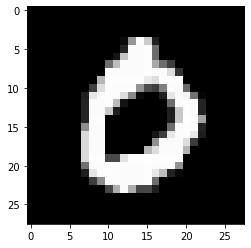

In [15]:
plt.figure()
plt.imshow(X_test[3].reshape(28,28), cmap='gray', interpolation='none')